In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import load_boston
df = load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
df['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
dataset = pd.DataFrame(df['data'],columns = df['feature_names']) 

In [8]:
dataset['target'] = df['target']
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
dataset.shape

(506, 14)

In [13]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [16]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(regressor,x,y,scoring='neg_mean_squared_error', cv=5)

In [17]:
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [19]:
np.mean(mse)

-37.13180746769922

## Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge() 

In [22]:
# for selecting hyper parameter value use gridsearchh cv
from sklearn.model_selection import GridSearchCV

In [23]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,50,100]}

In [26]:
ridge = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
ridge.best_params_

{'alpha': 100}

In [28]:
ridge.best_score_

-29.90570194754033

## Lasso

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_regressor = Lasso() 
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,50,100]}
lasso = GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
lasso.fit(x,y)
print(lasso.best_params_)
print(lasso.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

{'alpha': 1}
-35.531580220694856


## Elastic net

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
model = ElasticNet() 
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,50,100],'l1_ratio':np.arange(0, 1, 0.01)}
el_net = GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=5)
el_net.fit(x,y)
print(el_net.best_params_)
print(el_net.best_score_)

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4967.02450039611, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4503.786691910699, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4291.079974925977, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4922.966775125395, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4495.3471341719305, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4252.969577486829, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2607.0765182183227, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4581.678339187831, tolerance: 3.4809104444444445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4875.611442788778, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2604.924920734347, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4569.190497115659, tolerance: 3.4809104444444445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4828.165748159638, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4545.869966343475, tolerance: 3.4809104444444445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4895.594994893954, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4434.518534929993, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2593.9655598413956, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4544.641344843652, tolerance: 3.4809104444444445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4780.463000758663, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4150.874591696825, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2598.5945221314096, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4481.215526143953, tolerance: 3.4809104444444445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2586.4239545458386, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4485.482439741774, tolerance: 3.4809104444444445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4620.474013539032, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4387.640171895888, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4077.2924810137206, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2582.443208951275, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4050.642104808943, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4172.089099062478, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2578.9164208769466, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4309.153400134809, tolerance: 3.4809104444444445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4725.885915044654, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4218.720168462894, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4157.896754312396, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2557.2805680995602, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4500.3561156614915, tolerance: 3.4809104444444445
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4367.064057394127, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4021.0224004587517, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2485.9901724724145, tolerance: 3.3071762123456794
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conve

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4752.546748512933, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4297.144305452927, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4206.13620240433, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4565.105775309177, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3986.6649968011434, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4115.209882474177, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4761.174447022189, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3989.8855513535273, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4138.04297930394, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converg

C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7768.2261726879115, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6998.399582113895, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6226.791113765184, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Conver

{'alpha': 1, 'l1_ratio': 0.0}
-30.628222730937694


C:\Users\Praveen\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7364.594423622611, tolerance: 4.2716295415019765
  model = cd_fast.enet_coordinate_descent(


# Prediction

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
prediction_lasso = lasso.predict(x_test)
prediction_ridge = ridge.predict(x_test)
prediction_elNet = el_net.predict(x_test)

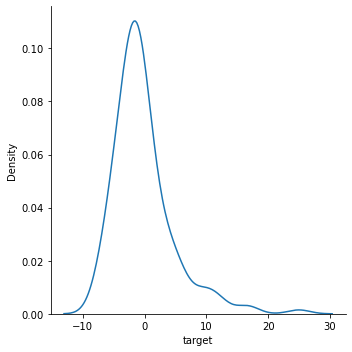

In [49]:
sns.displot(y_test-prediction_lasso, kind='kde')

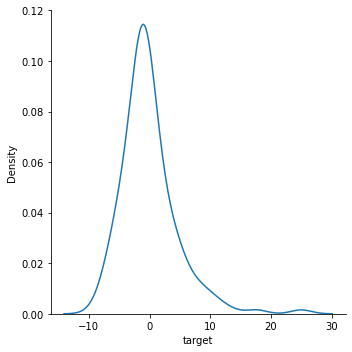

In [47]:
sns.displot(y_test - prediction_ridge,kind='kde')

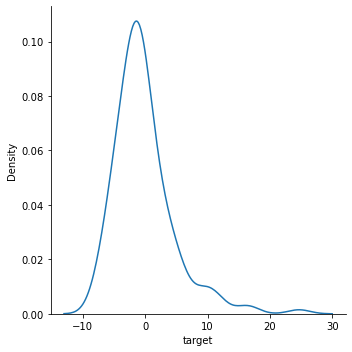

In [48]:
sns.displot(y_test-prediction_elNet,kind='kde')

In [45]:
from sklearn.metrics import r2_score

In [46]:
print('r2 score_ridge: ', r2_score(y_test,prediction_ridge))
print('r2 score_lasso: ', r2_score(y_test,prediction_lasso))
print('r2 score_elastic net: ', r2_score(y_test,prediction_elNet))

r2 score_ridge:  0.7127206587146265
r2 score_lasso:  0.6785488482770947
r2 score_elastic net:  0.6879512191799051
